In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip install pycaret

In [39]:
#import a selection of libraries and this is just an indicator as any libraries may be included.

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

from sklearn.preprocessing import StandardScaler

from pycaret.regression import setup, compare_models
from sklearn.model_selection import KFold, cross_val_score

from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

import optuna


In [40]:
train0 = pd.read_csv('/kaggle/input/3rd-programming-competition-bahrain-ai/house_data_train4.csv')
test0 = pd.read_csv('/kaggle/input/3rd-programming-competition-bahrain-ai/house_data_test4.csv')

In [41]:
train0

,id,sale_price,bedrooms,bathrooms,metersq_living,metersq_lot,floors,waterfront,view,condition,grade,metersq_above,metersq_basement,yr_built,block_no,location1,location2,metersq_built,metersq_land
0,2,442573.0,3,1.75,1780,7567,1.0,0,0,3,7,1290,490,1980,34,0.7314,-0.225,1910,8645
1,3,800000.0,4,2.25,2510,9963,1.0,0,0,4,9,2200,310,1967,5,0.5973,-0.177,3110,9963
2,4,205000.0,3,0.75,1080,5025,1.0,0,0,3,5,1080,0,1948,146,0.4936,-0.335,1370,6000
3,5,353000.0,4,1.50,1100,9600,1.0,0,0,4,6,1100,0,1960,33,0.7000,-0.175,1100,9630
4,6,230000.0,3,1.00,1380,10112,1.0,0,0,4,7,940,440,1963,23,0.3196,-0.351,1240,10112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28980,33305,230000.0,6,3.00,2180,7220,2.0,0,0,3,7,2180,0,1980,2040,1.5346,-1.495,2260,7344
28981,33306,230000.0,3,1.00,1020,12289,1.0,0,0,4,7,1020,0,1967,2046,1.6535,-1.345,1300,9894
28982,33307,225000.0,3,1.75,1460,8372,1.0,0,0,4,7,1460,0,1981,2035,1.5983,-1.277,1220,7803
28983,33308,225000.0,2,1.00,830,5720,1.0,0,0,4,6,830,0,1950,2038,1.9639,-1.529,1150,5250


In [42]:
test0

,id,bedrooms,bathrooms,metersq_living,metersq_lot,floors,waterfront,view,condition,grade,metersq_above,metersq_basement,yr_built,block_no,location1,location2,metersq_built,metersq_land
0,17292,3,3.00,2860,4500,2.0,0,2,3,8,1980,880,1915,119,0.6463,-0.371,2310,4500
1,17293,4,3.00,2100,8400,1.0,0,0,4,7,1240,860,1976,72,0.7350,-0.170,1980,8610
2,17294,2,2.00,1100,3000,2.0,0,0,3,7,1100,0,1912,117,0.6797,-0.362,1390,4000
3,17295,3,1.75,1880,5978,1.0,0,0,5,7,940,940,1957,144,0.5793,-0.294,1930,4770
4,17296,3,1.50,2440,7200,1.0,0,0,3,7,2440,0,1949,118,0.5604,-0.274,1920,6900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7243,36230,2,1.50,1556,20000,1.0,0,0,4,7,1556,0,1957,2066,1.6191,-1.472,2250,17286
7244,36231,3,2.00,1680,7000,2.0,0,0,4,7,1680,0,1968,2072,1.5075,-1.393,1540,7480
7245,36232,2,1.00,1070,6120,1.0,0,0,3,6,1070,0,1962,2056,1.7289,-1.507,1130,6120
7246,36233,4,1.00,1030,6621,1.0,0,0,4,6,1030,0,1955,2042,1.7157,-1.411,1420,6631


## Combining Train and Test Datasets

In [43]:
target = train0['sale_price']
test_ids = test0['id']

train1 = train0.drop(['id', 'sale_price'], axis=1)
test1 = test0.drop('id', axis=1)

data1 = pd.concat([train1, test1], axis=0).reset_index(drop=True)
data1

,bedrooms,bathrooms,metersq_living,metersq_lot,floors,waterfront,view,condition,grade,metersq_above,metersq_basement,yr_built,block_no,location1,location2,metersq_built,metersq_land
0,3,1.75,1780,7567,1.0,0,0,3,7,1290,490,1980,34,0.7314,-0.225,1910,8645
1,4,2.25,2510,9963,1.0,0,0,4,9,2200,310,1967,5,0.5973,-0.177,3110,9963
2,3,0.75,1080,5025,1.0,0,0,3,5,1080,0,1948,146,0.4936,-0.335,1370,6000
3,4,1.50,1100,9600,1.0,0,0,4,6,1100,0,1960,33,0.7000,-0.175,1100,9630
4,3,1.00,1380,10112,1.0,0,0,4,7,940,440,1963,23,0.3196,-0.351,1240,10112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36228,2,1.50,1556,20000,1.0,0,0,4,7,1556,0,1957,2066,1.6191,-1.472,2250,17286
36229,3,2.00,1680,7000,2.0,0,0,4,7,1680,0,1968,2072,1.5075,-1.393,1540,7480
36230,2,1.00,1070,6120,1.0,0,0,3,6,1070,0,1962,2056,1.7289,-1.507,1130,6120
36231,4,1.00,1030,6621,1.0,0,0,4,6,1030,0,1955,2042,1.7157,-1.411,1420,6631


In [44]:
target

0        442573.0
1        800000.0
2        205000.0
3        353000.0
4        230000.0
           ...   
28980    230000.0
28981    230000.0
28982    225000.0
28983    225000.0
28984    220000.0
Name: sale_price, Length: 28985, dtype: float64

## Data Cleaning

In [45]:
data2 = data1.copy()

### Ensuring proper data types in the model

In [46]:
#Making categorical columns as strings
data2['waterfront'] = data2['waterfront'].astype(str)
data2['view'] = data2['view'].astype(str)
data2['condition'] = data2['condition'].astype(str)
data2['grade'] = data2['grade'].astype(str)

In [47]:
data2.select_dtypes(np.number)

,bedrooms,bathrooms,metersq_living,metersq_lot,floors,metersq_above,metersq_basement,yr_built,block_no,location1,location2,metersq_built,metersq_land
0,3,1.75,1780,7567,1.0,1290,490,1980,34,0.7314,-0.225,1910,8645
1,4,2.25,2510,9963,1.0,2200,310,1967,5,0.5973,-0.177,3110,9963
2,3,0.75,1080,5025,1.0,1080,0,1948,146,0.4936,-0.335,1370,6000
3,4,1.50,1100,9600,1.0,1100,0,1960,33,0.7000,-0.175,1100,9630
4,3,1.00,1380,10112,1.0,940,440,1963,23,0.3196,-0.351,1240,10112
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36228,2,1.50,1556,20000,1.0,1556,0,1957,2066,1.6191,-1.472,2250,17286
36229,3,2.00,1680,7000,2.0,1680,0,1968,2072,1.5075,-1.393,1540,7480
36230,2,1.00,1070,6120,1.0,1070,0,1962,2056,1.7289,-1.507,1130,6120
36231,4,1.00,1030,6621,1.0,1030,0,1955,2042,1.7157,-1.411,1420,6631


In [48]:
data3 = data2.copy()

## Feature Engineering

In [49]:
data3['total_rooms'] = data3['bedrooms'] + data3['bathrooms']

In [50]:
data4 = data3.copy()

In [51]:
import datetime

# Get the current year
current_year = datetime.datetime.now().year

# Calculate age for each row
data4['age'] = data4['yr_built'].apply(lambda x: current_year - x)

#removing the yr_built column
data4.drop('yr_built', axis=1, inplace=True)

data4.head()

,bedrooms,bathrooms,metersq_living,metersq_lot,floors,waterfront,view,condition,grade,metersq_above,metersq_basement,block_no,location1,location2,metersq_built,metersq_land,total_rooms,age
0,3,1.75,1780,7567,1.0,0,0,3,7,1290,490,34,0.7314,-0.225,1910,8645,4.75,43
1,4,2.25,2510,9963,1.0,0,0,4,9,2200,310,5,0.5973,-0.177,3110,9963,6.25,56
2,3,0.75,1080,5025,1.0,0,0,3,5,1080,0,146,0.4936,-0.335,1370,6000,3.75,75
3,4,1.50,1100,9600,1.0,0,0,4,6,1100,0,33,0.7000,-0.175,1100,9630,5.50,63
4,3,1.00,1380,10112,1.0,0,0,4,7,940,440,23,0.3196,-0.351,1240,10112,4.00,60


## Feature Transformations

### Log Transform for Skewed Features

In [52]:
skew_df = pd.DataFrame(data4.select_dtypes(np.number).columns, columns=['feature'])
skew_df['skew'] = skew_df['feature'].apply(lambda feature: scipy.stats.skew(data4[feature]))
skew_df['absolute_skew'] = skew_df['skew'].apply(abs)
skew_df['skewed'] = skew_df['absolute_skew'].apply(lambda x: True if x >= 0.5 else False)
skew_df

,feature,skew,absolute_skew,skewed
0,bedrooms,2.256841,2.256841,True
1,bathrooms,0.324789,0.324789,False
2,metersq_living,1.499045,1.499045,True
3,metersq_lot,12.099504,12.099504,True
4,floors,0.432155,0.432155,False
5,metersq_above,1.442420,1.442420,True
6,metersq_basement,1.591213,1.591213,True
7,block_no,0.388269,0.388269,False
8,location1,0.357906,0.357906,False
9,location2,-44.832090,44.832090,True


In [53]:
for column in skew_df.query("skewed == True")['feature'].values:
    if column != 'location2':
        data4[column] = np.log1p(abs(data4[column]))

In [54]:
data4

,bedrooms,bathrooms,metersq_living,metersq_lot,floors,waterfront,view,condition,grade,metersq_above,metersq_basement,block_no,location1,location2,metersq_built,metersq_land,total_rooms,age
0,1.386294,1.75,7.484930,8.931684,1.0,0,0,3,7,7.163172,6.196444,34,0.7314,-0.225,7.555382,9.064852,1.749200,43
1,1.609438,2.25,7.828436,9.206734,1.0,0,0,4,9,7.696667,5.739793,5,0.5973,-0.177,8.042699,9.206734,1.981001,56
2,1.386294,0.75,6.985642,8.522380,1.0,0,0,3,5,6.985642,0.000000,146,0.4936,-0.335,7.223296,8.699681,1.558145,75
3,1.609438,1.50,7.003974,9.169623,1.0,0,0,4,6,7.003974,0.000000,33,0.7000,-0.175,7.003974,9.172742,1.871802,63
4,1.386294,1.00,7.230563,9.221577,1.0,0,0,4,7,6.846943,6.089045,23,0.3196,-0.351,7.123673,9.221577,1.609438,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36228,1.098612,1.50,7.350516,9.903538,1.0,0,0,4,7,7.350516,0.000000,2066,1.6191,-1.472,7.719130,9.757710,1.504077,66
36229,1.386294,2.00,7.427144,8.853808,2.0,0,0,4,7,7.427144,0.000000,2072,1.5075,-1.393,7.340187,8.920122,1.791759,55
36230,1.098612,1.00,6.976348,8.719481,1.0,0,0,3,6,6.976348,0.000000,2056,1.7289,-1.507,7.030857,8.719481,1.386294,61
36231,1.609438,1.00,6.938284,8.798153,1.0,0,0,4,6,6.938284,0.000000,2042,1.7157,-1.411,7.259116,8.799662,1.791759,68


In [55]:
data5 = data4.copy()

## Encode Categoricals

In [56]:
data5 = pd.get_dummies(data5)

In [57]:
data6 = data5.copy()

## Scaling

In [58]:
scaler = StandardScaler()
scaler.fit(data6)

data6 = pd.DataFrame(scaler.transform(data6), index=data6.index, columns=data6.columns)

In [59]:
data7 = data6.copy()

## Target Transformation

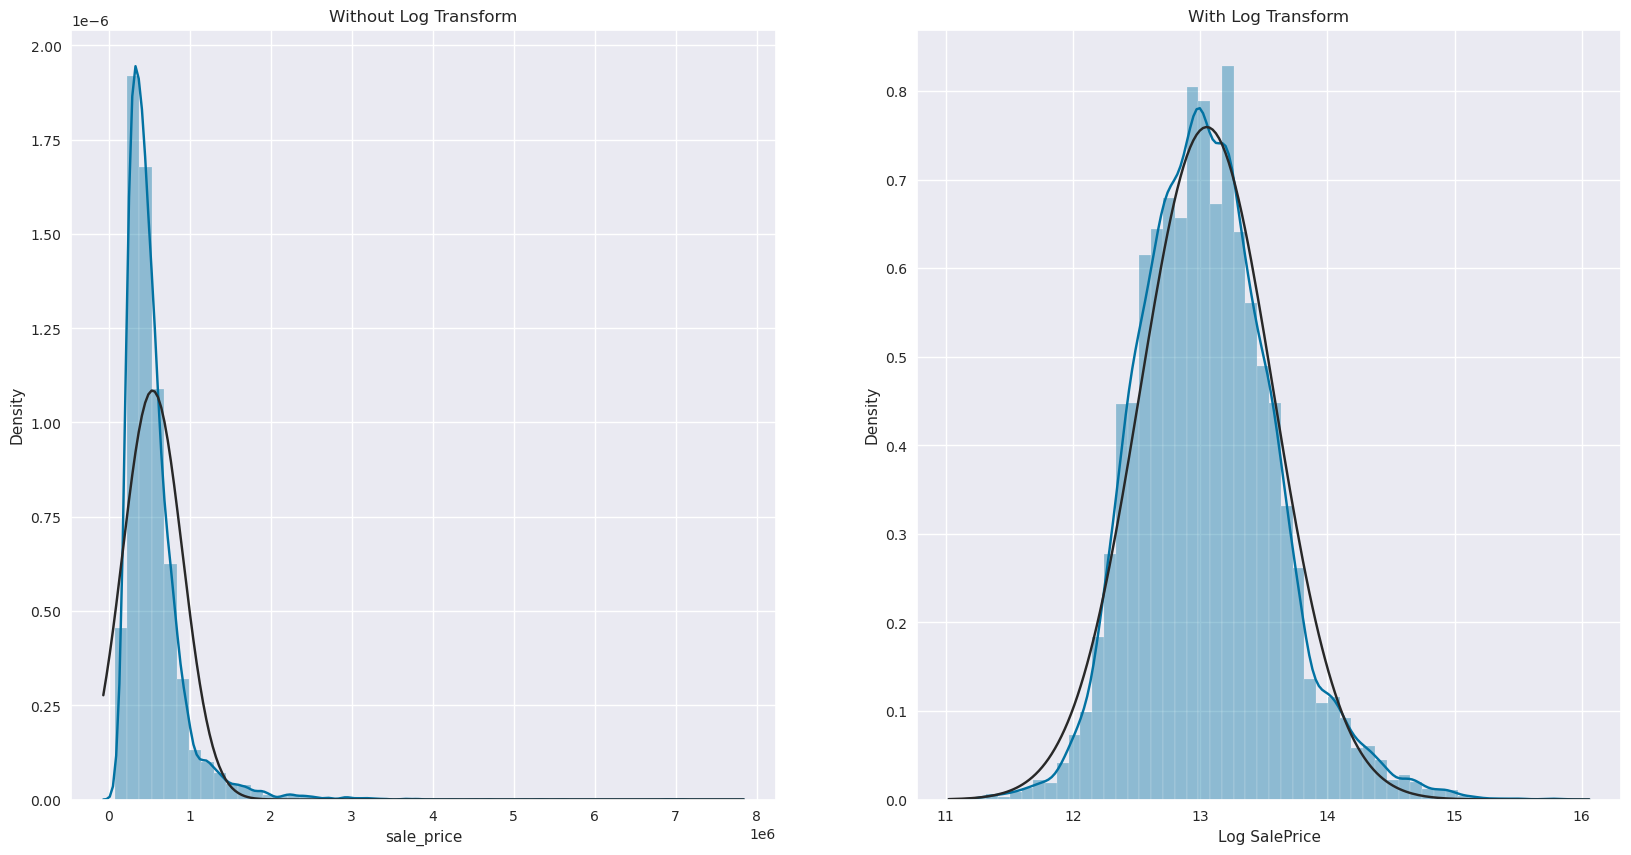

In [60]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.distplot(target, kde=True, fit=scipy.stats.norm)
plt.title("Without Log Transform")

plt.subplot(1, 2, 2)
sns.distplot(np.log(target), kde=True, fit=scipy.stats.norm)
plt.xlabel("Log SalePrice")
plt.title("With Log Transform")

plt.show()

In [61]:
log_target = np.log(target)

## Splitting data after all the preprocessing

In [62]:
train_final = data7.loc[:train0.index.max(), :].copy()
test_final = data7.loc[train0.index.max() + 1:, :].reset_index(drop=True).copy()

In [63]:
train_final

,bedrooms,bathrooms,metersq_living,metersq_lot,floors,metersq_above,metersq_basement,block_no,location1,location2,...,grade_11,grade_12,grade_13,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9
0,-0.316974,-0.539241,-0.163885,-0.066077,-0.962502,-0.550585,1.152717,-0.867399,-0.525618,0.024022,...,-0.138194,-0.063387,-0.025203,-0.0091,-0.035654,-0.105119,-0.319810,1.190303,-0.626161,-0.373846
1,0.733419,0.066674,0.645460,0.237708,-0.962502,0.697458,1.008851,-0.897602,-0.741774,0.024199,...,-0.138194,-0.063387,-0.025203,-0.0091,-0.035654,-0.105119,-0.319810,-0.840122,-0.626161,2.674897
2,-0.316974,-1.751071,-1.340274,-0.518143,-0.962502,-0.965895,-0.799444,-0.750750,-0.908929,0.023617,...,-0.138194,-0.063387,-0.025203,-0.0091,-0.035654,9.513016,-0.319810,-0.840122,-0.626161,-0.373846
3,0.733419,-0.842199,-1.297080,0.196720,-0.962502,-0.923009,-0.799444,-0.868440,-0.576232,0.024206,...,-0.138194,-0.063387,-0.025203,-0.0091,-0.035654,-0.105119,3.126854,-0.840122,-0.626161,-0.373846
4,-0.316974,-1.448114,-0.763207,0.254102,-0.962502,-1.290362,1.118882,-0.878855,-1.189401,0.023558,...,-0.138194,-0.063387,-0.025203,-0.0091,-0.035654,-0.105119,-0.319810,1.190303,-0.626161,-0.373846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28980,2.317279,0.975546,0.313487,-0.117916,0.800609,0.676103,-0.799444,1.221863,0.769065,0.019345,...,-0.138194,-0.063387,-0.025203,-0.0091,-0.035654,-0.105119,-0.319810,1.190303,-0.626161,-0.373846
28981,-0.316974,-1.448114,-1.474818,0.469435,-0.962502,-1.099482,-0.799444,1.228112,0.960720,0.019897,...,-0.138194,-0.063387,-0.025203,-0.0091,-0.035654,-0.105119,-0.319810,1.190303,-0.626161,-0.373846
28982,-0.316974,-0.539241,-0.630526,0.045567,-0.962502,-0.261195,-0.799444,1.216655,0.871743,0.020148,...,-0.138194,-0.063387,-0.025203,-0.0091,-0.035654,-0.105119,-0.319810,1.190303,-0.626161,-0.373846
28983,-1.671166,-1.448114,-1.959964,-0.375092,-0.962502,-1.581178,-0.799444,1.219780,1.461056,0.019220,...,-0.138194,-0.063387,-0.025203,-0.0091,-0.035654,-0.105119,3.126854,-0.840122,-0.626161,-0.373846


In [64]:
test_final

,bedrooms,bathrooms,metersq_living,metersq_lot,floors,metersq_above,metersq_basement,block_no,location1,location2,...,grade_11,grade_12,grade_13,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9
0,-0.316974,0.975546,0.952912,-0.639994,0.800609,0.451098,1.336897,-0.778870,-0.662791,0.023484,...,-0.138194,-0.063387,-0.025203,-0.0091,-0.035654,-0.105119,-0.319810,-0.840122,1.597033,-0.373846
1,0.733419,0.975546,0.225438,0.049254,-0.962502,-0.642989,1.329663,-0.827821,-0.519815,0.024225,...,-0.138194,-0.063387,-0.025203,-0.0091,-0.035654,-0.105119,-0.319810,1.190303,-0.626161,-0.373846
2,-1.671166,-0.236284,-1.297080,-1.087697,0.800609,-0.923009,-0.799444,-0.780954,-0.608953,0.023518,...,-0.138194,-0.063387,-0.025203,-0.0091,-0.035654,-0.105119,-0.319810,1.190303,-0.626161,-0.373846
3,-0.316974,-0.539241,-0.035173,-0.326374,-0.962502,-1.290362,1.357654,-0.752833,-0.770789,0.023768,...,-0.138194,-0.063387,-0.025203,-0.0091,-0.035654,-0.105119,-0.319810,1.190303,-0.626161,-0.373846
4,-0.316974,-0.842199,0.578844,-0.120979,-0.962502,0.939573,-0.799444,-0.779912,-0.801254,0.023842,...,-0.138194,-0.063387,-0.025203,-0.0091,-0.035654,-0.105119,-0.319810,1.190303,-0.626161,-0.373846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7243,-1.671166,-0.842199,-0.480582,1.007310,-0.962502,-0.112318,-0.799444,1.248942,0.905271,0.019430,...,-0.138194,-0.063387,-0.025203,-0.0091,-0.035654,-0.105119,-0.319810,1.190303,-0.626161,-0.373846
7244,-0.316974,-0.236284,-0.300037,-0.152089,0.800609,0.066943,-0.799444,1.255191,0.725382,0.019721,...,-0.138194,-0.063387,-0.025203,-0.0091,-0.035654,-0.105119,-0.319810,1.190303,-0.626161,-0.373846
7245,-1.671166,-1.448114,-1.362171,-0.300450,-0.962502,-0.987636,-0.799444,1.238527,1.082258,0.019301,...,-0.138194,-0.063387,-0.025203,-0.0091,-0.035654,-0.105119,3.126854,-0.840122,-0.626161,-0.373846
7246,0.733419,-1.448114,-1.451854,-0.213559,-0.962502,-1.076681,-0.799444,1.223946,1.060981,0.019654,...,-0.138194,-0.063387,-0.025203,-0.0091,-0.035654,-0.105119,3.126854,-0.840122,-0.626161,-0.373846


## Model Selection

In [65]:
# _ = setup(data=pd.concat([train_final, log_target], axis=1), target='sale_price')

In [66]:
# compare_models()

## Hyperparameter Optimization

In [67]:
def catboost_objective(trial):
    
    kf = KFold(n_splits=10)
    
    iterations=trial.suggest_int("iterations", 100, 10000)
    learning_rate=trial.suggest_float("learning_rate", 1e-3, 0.1, log=True)
    depth=trial.suggest_int("depth", 3, 10)
    l2_leaf_reg=trial.suggest_float("l2_leaf_reg", 1e-8, 100.0, log=True)
    bootstrap_type=trial.suggest_categorical("bootstrap_type", ["Bayesian"])
    random_strength=trial.suggest_float("random_strength", 1e-8, 10.0, log=True)
    bagging_temperature=trial.suggest_float("bagging_temperature", 0.0, 10.0)
    od_type=trial.suggest_categorical("od_type", ["IncToDec", "Iter"])
    od_wait=trial.suggest_int("od_wait", 10, 50)
    
    model = CatBoostRegressor(
        iterations=iterations,
        learning_rate=learning_rate,
        depth=depth,
        l2_leaf_reg=l2_leaf_reg,
        bootstrap_type=bootstrap_type,
        random_strength=random_strength,
        bagging_temperature=bagging_temperature,
        od_type=od_type,
        od_wait=od_wait,
        verbose=0,
        random_seed=42,
    )
    
    model.fit(train_final, log_target)
    
    cv_scores = np.exp(np.sqrt(-cross_val_score(model, train_final, log_target, scoring='neg_mean_squared_error', cv=kf)))
    
    return np.mean(cv_scores)

In [68]:
def xgboost_objective(trial):
    
    kf = KFold(n_splits=10)
    
    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0.01, 1.0),
        'subsample': trial.suggest_float('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
        'random_state': trial.suggest_int('random_state', 1, 1000)
    }
    
    model = XGBRegressor(**params)
    
    model.fit(train_final, log_target)
    
    cv_scores = np.exp(np.sqrt(-cross_val_score(model, train_final, log_target, scoring='neg_mean_squared_error', cv=kf)))
    
    return np.mean(cv_scores)

In [69]:
def lightgbm_objective(trial):
    
    kf = KFold(n_splits=10)
    
    params = {
        "objective": "regression",
        "metric": "rmse",
        "n_estimators": 1000,
        "verbosity": -1,
        "bagging_freq": 1,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 2**10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
    }
    
    model = LGBMRegressor(**params)
    
    model.fit(train_final, log_target)
    
    cv_scores = np.exp(np.sqrt(-cross_val_score(model, train_final, log_target, scoring='neg_mean_squared_error', cv=kf)))
    
    return np.mean(cv_scores)

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(lightgbm_objective, n_trials=100)

[I 2023-06-21 05:51:48,707] A new study created in memory with name: no-name-79339e45-7414-410a-9acf-9f67e236d44a


[LightGBM] [Warning] min_data_in_leaf is set=87, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=87
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=87, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=87
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=87, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=87
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=87, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=87
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=87, min_child_samples=20 will be ig

[I 2023-06-21 05:53:06,565] Trial 0 finished with value: 1.2000863502968062 and parameters: {'learning_rate': 0.061085619950376244, 'num_leaves': 892, 'subsample': 0.13065710013637855, 'colsample_bytree': 0.08270652120703958, 'min_data_in_leaf': 87}. Best is trial 0 with value: 1.2000863502968062.


[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Cu

[I 2023-06-21 06:38:52,000] Trial 1 finished with value: 1.1782643196706075 and parameters: {'learning_rate': 0.07546247598671284, 'num_leaves': 953, 'subsample': 0.4017824569589138, 'colsample_bytree': 0.9791871001627682, 'min_data_in_leaf': 3}. Best is trial 1 with value: 1.1782643196706075.


[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ig

[I 2023-06-21 06:48:51,806] Trial 2 finished with value: 1.1926640331601788 and parameters: {'learning_rate': 0.002858846458336529, 'num_leaves': 222, 'subsample': 0.45607053350578214, 'colsample_bytree': 0.9759058926740241, 'min_data_in_leaf': 23}. Best is trial 1 with value: 1.1782643196706075.


[LightGBM] [Warning] min_data_in_leaf is set=71, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=71
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=71, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=71
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=71, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=71
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=71, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=71
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=71, min_child_samples=20 will be ig

[I 2023-06-21 06:59:19,755] Trial 3 finished with value: 1.233345065926674 and parameters: {'learning_rate': 0.002095251034091321, 'num_leaves': 529, 'subsample': 0.8855266914388268, 'colsample_bytree': 0.4157519069410239, 'min_data_in_leaf': 71}. Best is trial 1 with value: 1.1782643196706075.


[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Cu

[I 2023-06-21 07:03:58,340] Trial 4 finished with value: 1.1730633435594646 and parameters: {'learning_rate': 0.007118926065188031, 'num_leaves': 79, 'subsample': 0.5571427274317907, 'colsample_bytree': 0.7513994912487743, 'min_data_in_leaf': 6}. Best is trial 4 with value: 1.1730633435594646.


[LightGBM] [Warning] min_data_in_leaf is set=93, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=93
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=93, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=93
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=93, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=93
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=93, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=93
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=93, min_child_samples=20 will be ig

[I 2023-06-21 07:07:16,625] Trial 5 finished with value: 1.175318165653278 and parameters: {'learning_rate': 0.06209845603831912, 'num_leaves': 635, 'subsample': 0.29125875404634105, 'colsample_bytree': 0.7094251079657478, 'min_data_in_leaf': 93}. Best is trial 4 with value: 1.1730633435594646.


[LightGBM] [Warning] min_data_in_leaf is set=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=47, min_child_samples=20 will be ig

[I 2023-06-21 07:16:41,020] Trial 6 finished with value: 1.1800694728257703 and parameters: {'learning_rate': 0.004904234291341668, 'num_leaves': 389, 'subsample': 0.4877896406125845, 'colsample_bytree': 0.8386134269782819, 'min_data_in_leaf': 47}. Best is trial 4 with value: 1.1730633435594646.


[LightGBM] [Warning] min_data_in_leaf is set=54, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=54
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=54, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=54
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=54, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=54
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=54, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=54
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=54, min_child_samples=20 will be ig

[I 2023-06-21 07:20:40,874] Trial 7 finished with value: 1.2294366561068082 and parameters: {'learning_rate': 0.0023587282764566298, 'num_leaves': 748, 'subsample': 0.21036478147093635, 'colsample_bytree': 0.9435863997297992, 'min_data_in_leaf': 54}. Best is trial 4 with value: 1.1730633435594646.


[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Cu

[I 2023-06-21 07:58:33,646] Trial 8 finished with value: 1.1543722561001528 and parameters: {'learning_rate': 0.025059007458605037, 'num_leaves': 810, 'subsample': 0.36795168789369187, 'colsample_bytree': 0.18742129537023355, 'min_data_in_leaf': 1}. Best is trial 8 with value: 1.1543722561001528.


[LightGBM] [Warning] min_data_in_leaf is set=52, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=52
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=52, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=52
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=52, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=52
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=52, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=52
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=52, min_child_samples=20 will be ig

[I 2023-06-21 08:03:31,986] Trial 9 finished with value: 1.1734911853830727 and parameters: {'learning_rate': 0.0912579483313492, 'num_leaves': 631, 'subsample': 0.27840794211848197, 'colsample_bytree': 0.9386933002008454, 'min_data_in_leaf': 52}. Best is trial 8 with value: 1.1543722561001528.


[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ig

[I 2023-06-21 08:05:47,744] Trial 10 finished with value: 1.2047242142086882 and parameters: {'learning_rate': 0.019042083844920597, 'num_leaves': 1014, 'subsample': 0.07873999001302956, 'colsample_bytree': 0.1031906367746501, 'min_data_in_leaf': 29}. Best is trial 8 with value: 1.1543722561001528.


[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Cu

[I 2023-06-21 08:07:23,333] Trial 11 finished with value: 1.1789628660656803 and parameters: {'learning_rate': 0.013606787503195066, 'num_leaves': 21, 'subsample': 0.6085489523798107, 'colsample_bytree': 0.5284174961090968, 'min_data_in_leaf': 1}. Best is trial 8 with value: 1.1543722561001528.


[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ig

[I 2023-06-21 08:10:44,097] Trial 12 finished with value: 1.1872914213419434 and parameters: {'learning_rate': 0.007001844171678041, 'num_leaves': 55, 'subsample': 0.6313398626976934, 'colsample_bytree': 0.28392575529168573, 'min_data_in_leaf': 19}. Best is trial 8 with value: 1.1543722561001528.


[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ig

[I 2023-06-21 08:28:40,826] Trial 13 finished with value: 1.1578670994556366 and parameters: {'learning_rate': 0.024079966760570306, 'num_leaves': 364, 'subsample': 0.7014560496239024, 'colsample_bytree': 0.6474839362729301, 'min_data_in_leaf': 15}. Best is trial 8 with value: 1.1543722561001528.


[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ig

[I 2023-06-21 08:46:17,766] Trial 14 finished with value: 1.1599483708136358 and parameters: {'learning_rate': 0.02002178777029966, 'num_leaves': 361, 'subsample': 0.7361809018304397, 'colsample_bytree': 0.5821698646618557, 'min_data_in_leaf': 38}. Best is trial 8 with value: 1.1543722561001528.


[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ig

[I 2023-06-21 09:22:27,878] Trial 15 finished with value: 1.1534395882483843 and parameters: {'learning_rate': 0.03165328713266769, 'num_leaves': 801, 'subsample': 0.9789712268370827, 'colsample_bytree': 0.32477463776362975, 'min_data_in_leaf': 15}. Best is trial 15 with value: 1.1534395882483843.


[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ig

[I 2023-06-21 09:45:29,441] Trial 16 finished with value: 1.154040591373551 and parameters: {'learning_rate': 0.032487496380710676, 'num_leaves': 794, 'subsample': 0.8970558927559631, 'colsample_bytree': 0.2778574757344276, 'min_data_in_leaf': 33}. Best is trial 15 with value: 1.1534395882483843.


[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ig

[I 2023-06-21 10:09:47,113] Trial 17 finished with value: 1.1527069495289193 and parameters: {'learning_rate': 0.041924453297038485, 'num_leaves': 773, 'subsample': 0.9528801508426737, 'colsample_bytree': 0.3495570454088045, 'min_data_in_leaf': 34}. Best is trial 17 with value: 1.1527069495289193.


[LightGBM] [Warning] min_data_in_leaf is set=62, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=62
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=62, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=62
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=62, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=62
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=62, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=62
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=62, min_child_samples=20 will be ig

[I 2023-06-21 10:24:26,656] Trial 18 finished with value: 1.1553722259413017 and parameters: {'learning_rate': 0.040285474289194316, 'num_leaves': 672, 'subsample': 0.9829575184862283, 'colsample_bytree': 0.4238378839322863, 'min_data_in_leaf': 62}. Best is trial 17 with value: 1.1527069495289193.


[LightGBM] [Warning] min_data_in_leaf is set=43, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=43
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=43, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=43
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=43, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=43
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=43, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=43
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=43, min_child_samples=20 will be ig

[I 2023-06-21 10:44:14,182] Trial 19 finished with value: 1.1536656267448049 and parameters: {'learning_rate': 0.0409073313705321, 'num_leaves': 528, 'subsample': 0.9983640474283385, 'colsample_bytree': 0.4090263437973858, 'min_data_in_leaf': 43}. Best is trial 17 with value: 1.1527069495289193.


[LightGBM] [Warning] min_data_in_leaf is set=12, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=12
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=12, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=12
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=12, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=12
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=12, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=12
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=12, min_child_samples=20 will be ig

[I 2023-06-21 11:25:02,999] Trial 20 finished with value: 1.1570805753401054 and parameters: {'learning_rate': 0.012820362196962686, 'num_leaves': 870, 'subsample': 0.8093404425425859, 'colsample_bytree': 0.3150877275931088, 'min_data_in_leaf': 12}. Best is trial 17 with value: 1.1527069495289193.


[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=20 will be ig

In [ ]:
study.best_params

## Bagging Ensemble

In [ ]:
catboost_params = {
    'iterations': 6000,
    'learning_rate': 0.005,
    'depth': 4,
    'l2_leaf_reg': 1,
    'eval_metric':'RMSE',
    'early_stopping_rounds': 200,
    'random_seed': 42
}


xgboost_params = {
    'max_depth': 7
    'learning_rate': 0.06
    'n_estimators': 3000
    'min_child_weight': 3,
    'gamma': 0,
    'subsample': 1,
    'colsample_bytree': 0.8,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'random_state': 42
}


lightgbm_params = {
    "objective": "regression",
    "metric": "rmse",
    "n_estimators": 1000,
    "verbosity": -1,
    "bagging_freq": 1,
    'learning_rate': 0.13705339989856127,
    'num_leaves': 39,
    'subsample': 1,
    'colsample_bytree': 0.8,
    "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
    'max_depth': 2,
}

In [ ]:
models = {
    "catboost": CatBoostRegressor(**catboost_params, verbose=0, random_seed=42),
    "xgboost": XGBRegressor(**catboost_params, verbose=0, random_seed=42),
    "lightgbm": LGBMRegressor(**lightgbm_params),
}

In [ ]:
for name, model in models.items():
    model.fit(train_final, log_target)
    print(name + " trained.")

## Evaluate Model

In [ ]:
results = {}

kf = KFold(n_splits=10)

for name, model in models.items():
    result = np.exp(np.sqrt(-cross_val_score(model, train_final, log_target, scoring='neg_mean_squared_error', cv=kf)))
    results[name] = result

In [ ]:
results

In [ ]:
for name, result in results.items():
    print("----------\n" + name)
    print(np.mean(result))
    print(np.std(result))

## Combine Predictions

In [ ]:
final_predictions = (
    0.4 * np.exp(models['catboost'].predict(test_final)) +
    0.3 * np.exp(models['xgboost'].predict(test_final)) +
    0.3 * np.exp(models['lightgbm'].predict(test_final)) +
)

In [ ]:
final_predictions

## Submission

In [ ]:
submission = pd.concat([test_ids, pd.Series(final_predictions, name='price')],axis=1)
submission

In [ ]:
submission.to_csv('/kaggle/working/submission.csv',index=False) # save to notebook output

In [ ]:
######################
# 0.14999   
#####################
# 1.164623252803075
# 0.007715196705553264

######################
# 
#####################